In [44]:
import sys
sys.path.append('..')

from app_backend.data_manager import DataManager
from app_backend.pca_handler import PCAHandler

In [45]:
data_frame = DataManager()
data_frame.read_from_csv('datasets/Zeszyt1_akt.csv', sep=';')
data_frame.get_df()

,ID,Timestamp,Zmienna A,Zmienna B,Zmienna C,Zmienna D,Zmienna E,Zmienna F,Zmienna G,Case ID
0,1,01.01.2020 00:00,"176,8","81,4",60.0,1.0,"88,09999847","98,73999786",0,1
1,2,01.01.2020 00:10,"178,1","72,6",49.0,1.0,"79,40000153","95,26000214",0,1
2,3,01.01.2020 00:20,"152,1","60,5",34.0,1.0,"79,40000153","95,26000214",0,1
3,4,01.01.2020 00:30,"165,1","72,6",53.0,1.0,"81,13999939","95,26000214",0,1
4,5,01.01.2020 00:40,"176,8","82,5",58.0,1.0,"79,40000153",97,0,1
...,...,...,...,...,...,...,...,...,...,...
295,296,03.01.2020 01:10,"114,4","63,8",70.0,1.0,"72,44000244","90,04000092",0,17
296,297,03.01.2020 01:20,"171,6","69,3",46.0,1.0,"79,40000153",97,0,17
297,298,03.01.2020 01:30,"94,9","60,5",31.0,0.0,"70,69999695","84,81999969",0,17
298,299,03.01.2020 01:40,"157,3","64,9",32.0,1.0,"79,40000153","93,51999664",0,17


## Try change the type of variable that is not float

In [46]:
print(data_frame.get_variable_type('Timestamp'))
try:
    data_frame.change_variable_type('Timestamp')
except Exception as e:
    print(f"Essa, działa bombowo: {e}")

categorical
Essa, działa bombowo: An error occurred while changing variable type: Cannot convert column 'Timestamp' to numeric. Ensure that all values, including comma-separated decimals, are convertible to float.


## Change the variable types

In [47]:
data_frame.delete_variable('Timestamp')
data_frame.change_variable_type('Zmienna A')
data_frame.change_variable_type('Zmienna B')
data_frame.change_variable_type('Zmienna E')
data_frame.change_variable_type('Zmienna F')

In [48]:
data_frame.remove_nan_rows()

In [49]:
data_frame.get_variable_types()

{'ID': 'numerical',
 'Zmienna A': 'numerical',
 'Zmienna B': 'numerical',
 'Zmienna C': 'numerical',
 'Zmienna D': 'numerical',
 'Zmienna E': 'numerical',
 'Zmienna F': 'numerical',
 'Zmienna G': 'numerical',
 'Case ID': 'numerical'}

In [50]:
data_frame.get_df()

,ID,Zmienna A,Zmienna B,Zmienna C,Zmienna D,Zmienna E,Zmienna F,Zmienna G,Case ID
0,1,176.8,81.4,60.0,1.0,88.099998,98.739998,0,1
1,2,178.1,72.6,49.0,1.0,79.400002,95.260002,0,1
2,3,152.1,60.5,34.0,1.0,79.400002,95.260002,0,1
3,4,165.1,72.6,53.0,1.0,81.139999,95.260002,0,1
4,5,176.8,82.5,58.0,1.0,79.400002,97.000000,0,1
...,...,...,...,...,...,...,...,...,...
294,295,170.3,71.5,41.0,1.0,79.400002,95.260002,0,17
295,296,114.4,63.8,70.0,1.0,72.440002,90.040001,0,17
296,297,171.6,69.3,46.0,1.0,79.400002,97.000000,0,17
297,298,94.9,60.5,31.0,0.0,70.699997,84.820000,0,17


In [51]:
pca1 = data_frame.PCA(2)
pca1.get_df()

,pc1,pc2
0,-149.044586,-28.397265
1,-148.135475,-22.129438
2,-147.388046,7.084511
3,-146.162223,-11.927930
4,-145.038470,-25.737855
...,...,...
293,145.202861,-11.703524
294,146.174044,35.928883
295,147.224126,-13.860386
296,147.839540,64.358345


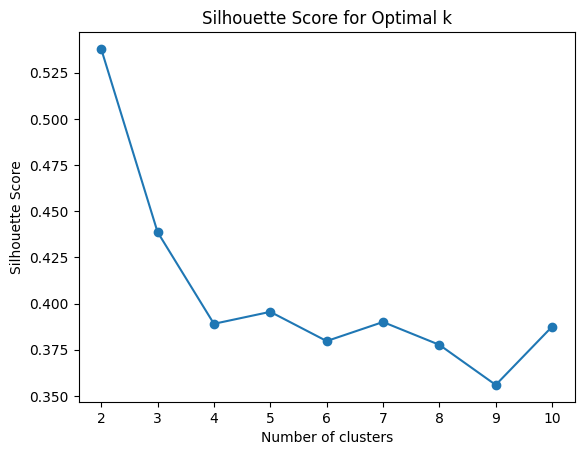

2

In [52]:
pca1.suggest_clusters_kmeans(10, True)

In [53]:
eps = pca1.suggest_clusters_dbscan(10)
eps

31.103663400672616

{0: ['pc2', 'pc1'], 1: ['pc1', 'pc2']} [<matplotlib.lines.Line2D object at 0x00000213A5DF08D0>, <matplotlib.lines.Line2D object at 0x00000213A5DF1290>]


<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

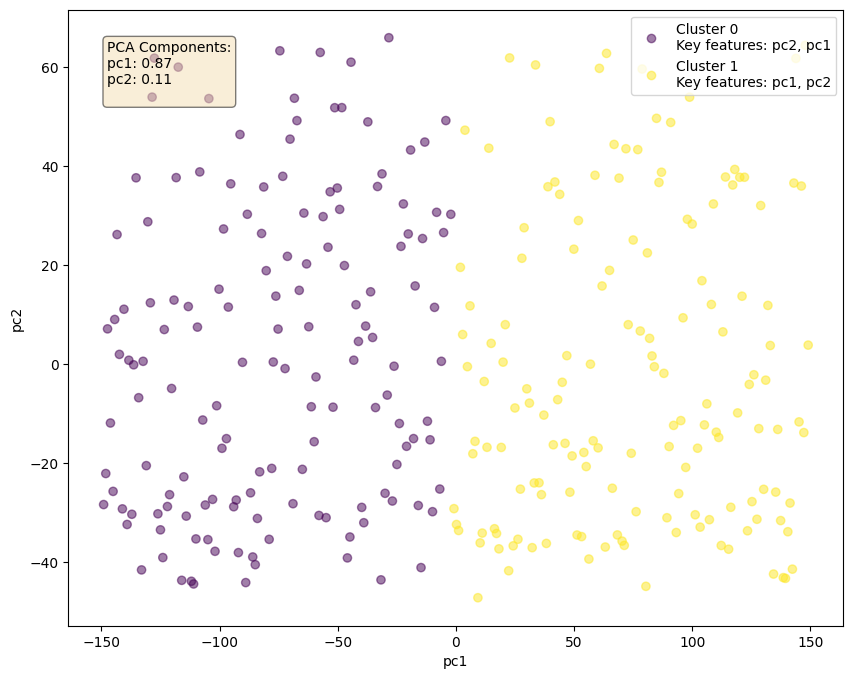

In [54]:
pca1.kmeans_clustering(2)
pca1.plot_2d('pc1', 'pc2')

{} [<matplotlib.lines.Line2D object at 0x00000213A5D0E590>]


<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

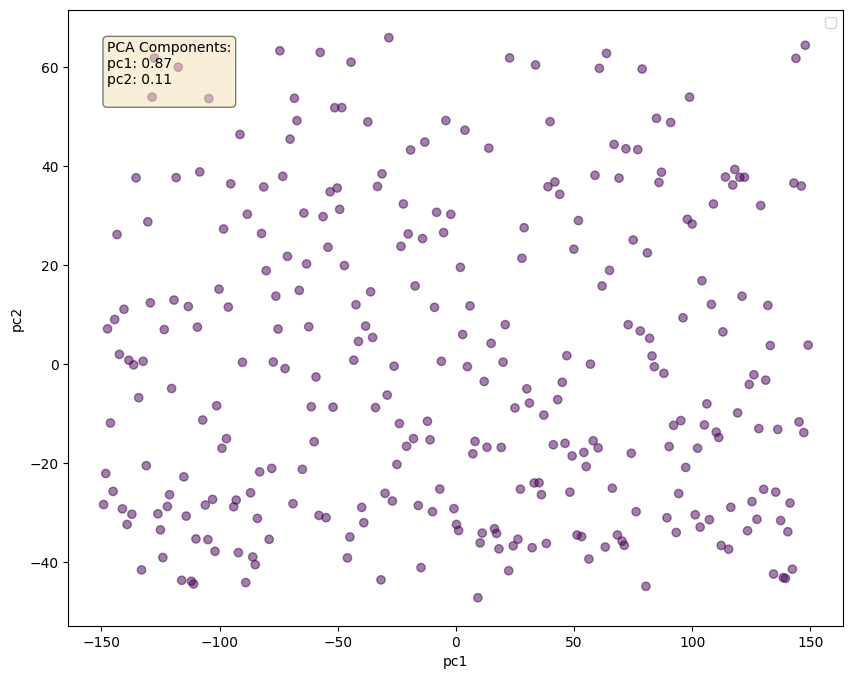

In [55]:
pca1.dbscan_clustering(eps=0.3, min_samples=5)
pca1.plot_2d('pc1', 'pc2')

In [56]:
import pandas as pd
import numpy as np

# TEST DF 2

In [57]:

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,\
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, \
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
Xa = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

X = pd.DataFrame(Xa, columns=['pc1', 'pc2'])

pca = PCAHandler(X, [5, 5])

<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

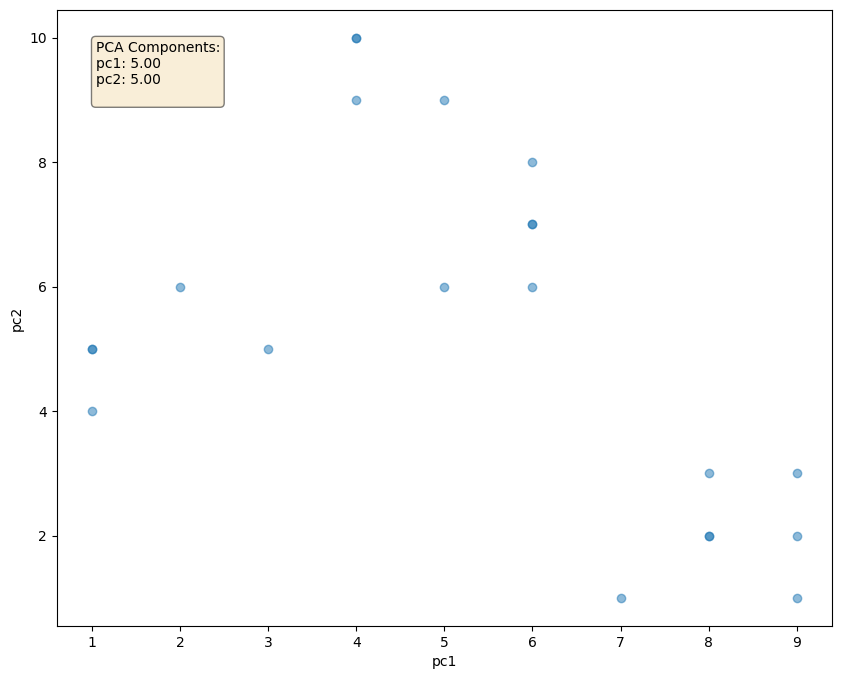

In [58]:
pca.plot_2d('pc1', 'pc2')

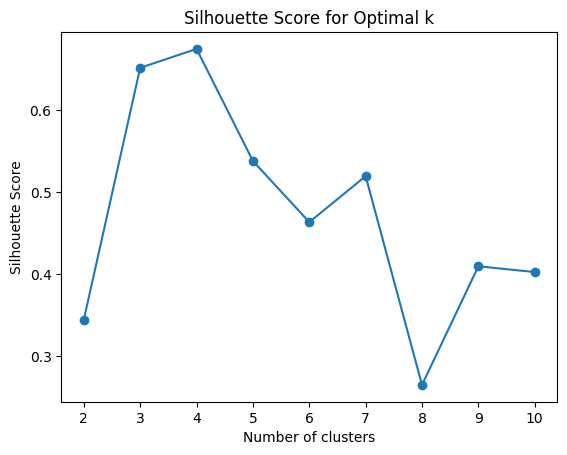

4


In [59]:
t = pca.suggest_clusters_kmeans(draw_graph=True)
print(t)

{0: ['pc2', 'pc1'], 1: ['pc1', 'pc2'], 2: ['pc2', 'pc1'], 3: ['pc2', 'pc1']} [<matplotlib.lines.Line2D object at 0x00000213A5B7F350>, <matplotlib.lines.Line2D object at 0x00000213A5B7B7D0>, <matplotlib.lines.Line2D object at 0x00000213A5B7BED0>, <matplotlib.lines.Line2D object at 0x00000213A5B78390>]


<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

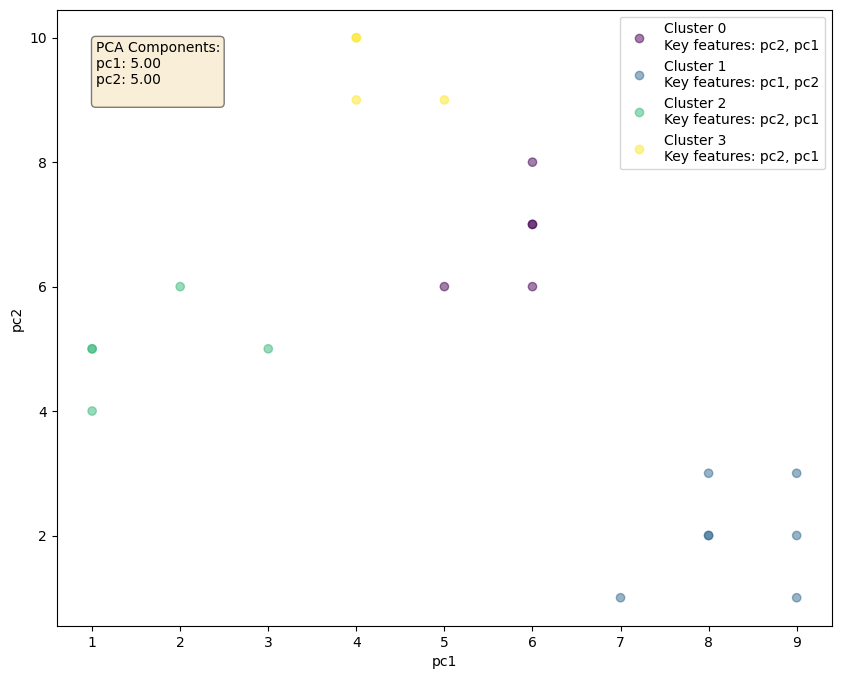

In [60]:
pca.kmeans_clustering(t)
pca.plot_2d('pc1', 'pc2')

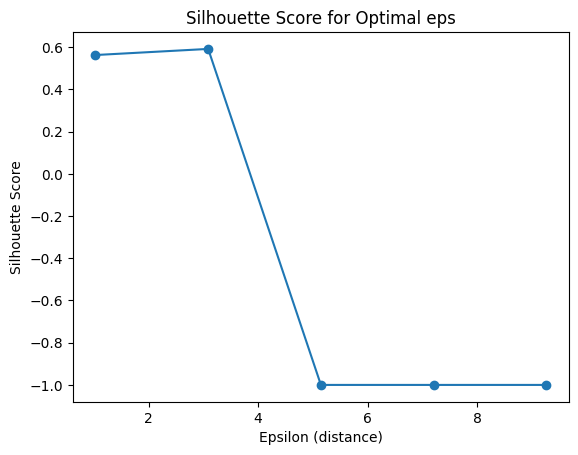

3.0886890422961004


In [61]:
t = pca.suggest_clusters_dbscan(4, True)
print(t)

{0: ['pc2', 'pc1'], 1: ['pc1', 'pc2']} [<matplotlib.lines.Line2D object at 0x00000213A5ABB590>, <matplotlib.lines.Line2D object at 0x00000213A5ACAD50>]


<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

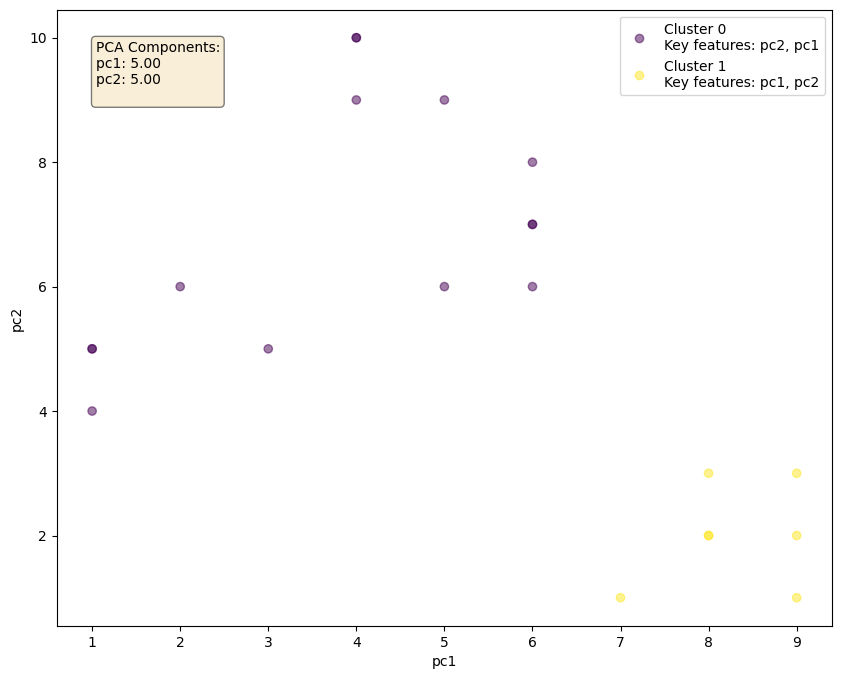

In [62]:
pca.dbscan_clustering(eps=t, min_samples=4)
pca.plot_2d('pc1', 'pc2')

# TEST DF 3

In [64]:
Xa = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [0, 1],
    [10, 5],
    [10, 0],
    [0, 10],
    [1, 10],
    [10, 6],
    [11,11],
    [0, 11],
    [1, 11],
    [12, 11],
    [11, 5],
    [12, 5],
    [11, 6],
    [6, 6],
    [6, 4]]
)

X = pd.DataFrame(Xa, columns=['pc1', 'pc2'])

pca = PCAHandler(X, [3, 3])

<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

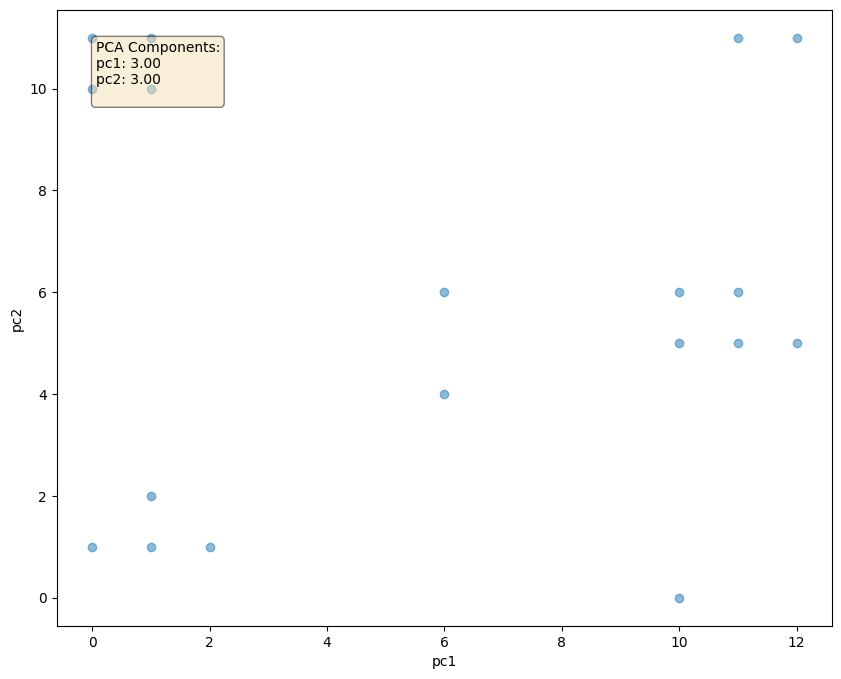

In [65]:
pca.plot_2d('pc1', 'pc2')

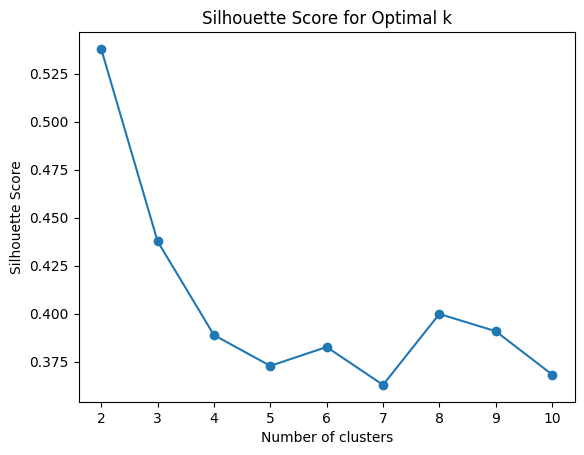

In [66]:
t = pca1.suggest_clusters_kmeans(draw_graph=True)

In [67]:
print(t)

2


{0: ['pc1', 'pc2'], 1: ['pc2', 'pc1']} [<matplotlib.lines.Line2D object at 0x000002139DBE2150>, <matplotlib.lines.Line2D object at 0x000002139E621510>]


<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

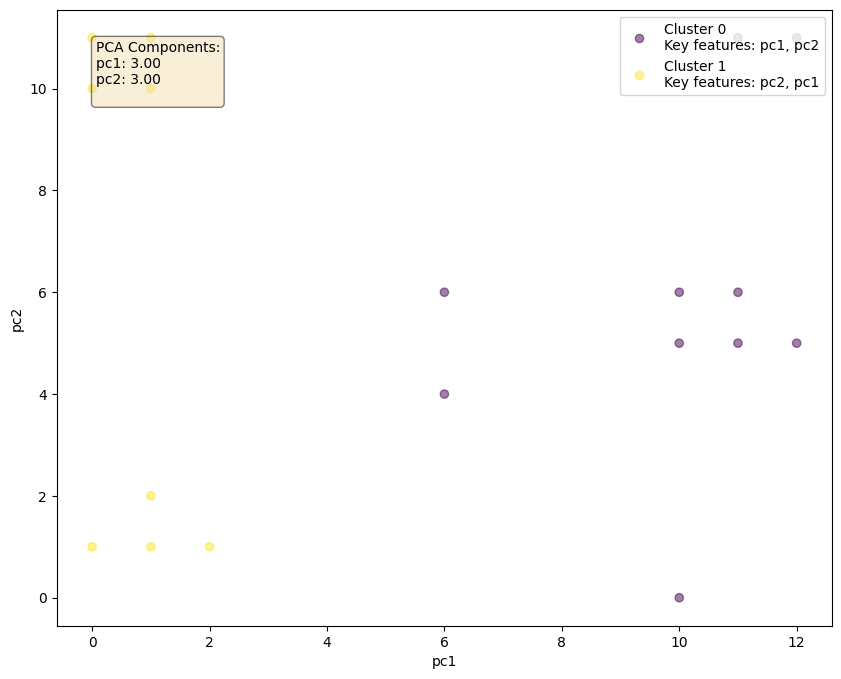

In [68]:
pca.kmeans_clustering(t)
pca.plot_2d('pc1', 'pc2')

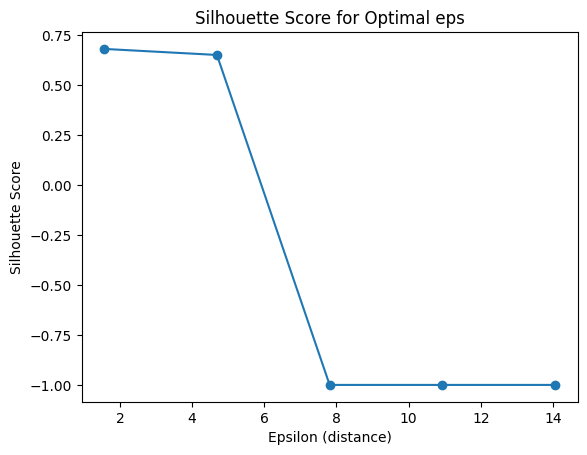

1.5620499351813308


In [69]:
t = pca.suggest_clusters_dbscan(min_samples=2, draw_graph=True)
print(t)

{0: ['pc2', 'pc1'], 1: ['pc1', 'pc2'], 2: ['pc2', 'pc1'], 3: ['pc1', 'pc2']} [<matplotlib.lines.Line2D object at 0x00000213A4B22B50>, <matplotlib.lines.Line2D object at 0x000002139EA59950>, <matplotlib.lines.Line2D object at 0x000002139EA5A490>, <matplotlib.lines.Line2D object at 0x000002139EA598D0>, <matplotlib.lines.Line2D object at 0x000002139EA80210>]


<module 'matplotlib.pyplot' from 'C:\\Users\\48501\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

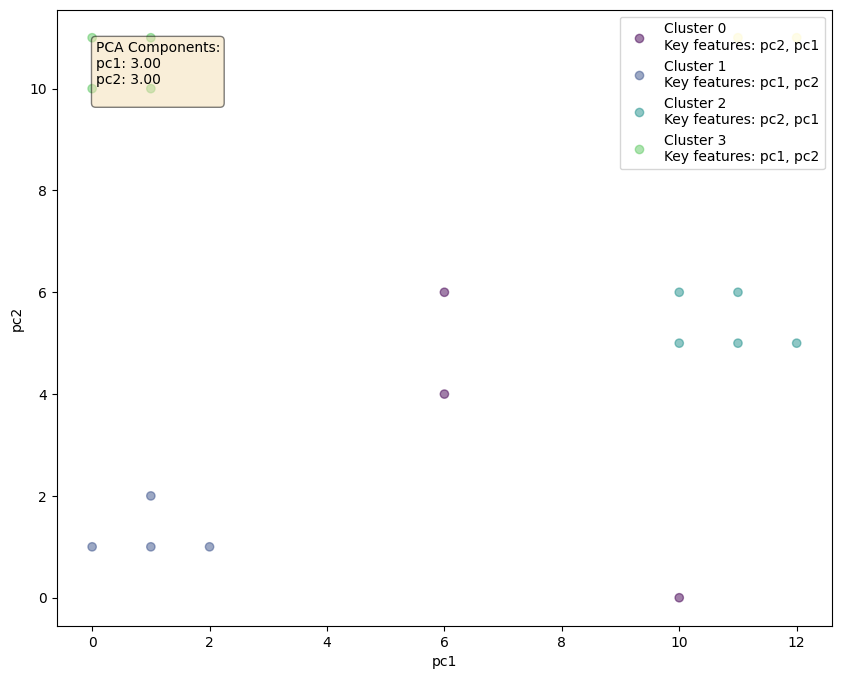

In [70]:
pca.dbscan_clustering(t, min_samples=2)
pca.plot_2d('pc1', 'pc2')